In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/eskom/ESKOM.xlsx')

In [ ]:
df.head()

,MO/YR,Western Cape,Eastern Cape,Northern Cape,Free State,KwaZulu-Natal,North west,Gauteng,Mpumalanga,Limpopo,South Africa
0,01/01/2002,1605,436,402,1151,3071,1335,4404,2464,950,15818
1,01/02/2002,1578,434,394,1058,2847,1219,4144,2264,875,14813
2,01/03/2002,1716,471,389,1140,3105,1381,4530,2473,968,16173
3,01/04/2002,1587,499,342,1136,3055,1368,4498,2489,919,15893
4,01/05/2002,1666,537,363,1242,3277,1472,5086,2655,1016,17314


In [ ]:
df.tail()

,MO/YR,Western Cape,Eastern Cape,Northern Cape,Free State,KwaZulu-Natal,North west,Gauteng,Mpumalanga,Limpopo,South Africa
265,01/02/2024,1543,662,508,798,2959,1595,3896,2340,1626,15928
266,01/03/2024,1635,704,526,865,3219,1773,4196,2506,1802,17227
267,2024-04-01 00:00:00,1592,718,439,878,3152,1661,4327,2496,1728,16991
268,2024-05-01 00:00:00,1677,742,467,928,3308,1730,4589,2682,1746,17868
269,2024-06-01 00:00:00,1654,751,476,952,3298,1808,5120,2619,1800,18478


In [ ]:
df.describe()

,Western Cape,Eastern Cape,Northern Cape,Free State,KwaZulu-Natal,North west,Gauteng,Mpumalanga,Limpopo,South Africa
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,1846.137037,655.529630,463.848148,1003.596296,3473.666667,1720.455556,5040.459259,2666.725926,1482.640741,18369.025926
std,144.530414,90.175526,50.709640,101.299420,238.403784,156.052643,546.944290,150.831348,242.554621,1117.255694
min,1408.000000,434.000000,330.000000,748.000000,2826.000000,824.000000,3692.000000,2077.000000,875.000000,14813.000000
25%,1772.000000,588.250000,430.500000,937.500000,3310.750000,1658.250000,4652.500000,2568.750000,1302.750000,17700.000000
50%,1875.000000,655.500000,465.500000,998.500000,3471.000000,1741.500000,4986.000000,2674.500000,1560.500000,18446.500000
75%,1941.000000,724.000000,501.750000,1068.000000,3646.750000,1831.500000,5365.750000,2773.750000,1677.750000,19071.250000
max,2102.000000,850.000000,598.000000,1292.000000,4019.000000,1997.000000,6486.000000,3011.000000,1848.000000,21055.000000


In [ ]:
print(df.dtypes)

MO/YR            object
Western Cape      int64
Eastern Cape      int64
Northern Cape     int64
Free State        int64
KwaZulu-Natal     int64
North west        int64
Gauteng           int64
Mpumalanga        int64
Limpopo           int64
South Africa      int64
dtype: object


In [ ]:
# Convert the 'MO/YR' column to datetime
df['MO/YR'] = pd.to_datetime(df['MO/YR'], format='%d/%m/%Y')

In [ ]:
# Set 'MO/YR' as index
df.set_index('MO/YR', inplace=True)

In [ ]:
# Filter for the last 5 years
last_five_years = df[df.index.year >= (df.index.year.max() - 5)]

In [ ]:
last_five_years.describe()

,Western Cape,Eastern Cape,Northern Cape,Free State,KwaZulu-Natal,North west,Gauteng,Mpumalanga,Limpopo,South Africa
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1683.090909,723.257576,498.878788,895.590909,3264.924242,1732.454545,4653.575758,2579.151515,1695.121212,17791.363636
std,143.731879,52.099700,39.879247,70.061287,161.128359,193.742508,524.265026,134.433883,91.428916,993.161225
min,1408.000000,581.000000,378.000000,748.000000,2826.000000,824.000000,3692.000000,2221.000000,1189.000000,15094.000000
25%,1577.000000,696.250000,473.250000,838.250000,3156.250000,1669.000000,4314.250000,2512.000000,1661.000000,17180.000000
50%,1673.000000,726.000000,503.000000,891.500000,3297.500000,1772.500000,4578.500000,2589.000000,1705.500000,17811.500000
75%,1783.750000,766.000000,517.000000,943.750000,3378.750000,1862.250000,4995.500000,2666.750000,1746.000000,18496.000000
max,2018.000000,811.000000,598.000000,1046.000000,3550.000000,1997.000000,5865.000000,2877.000000,1848.000000,19851.000000


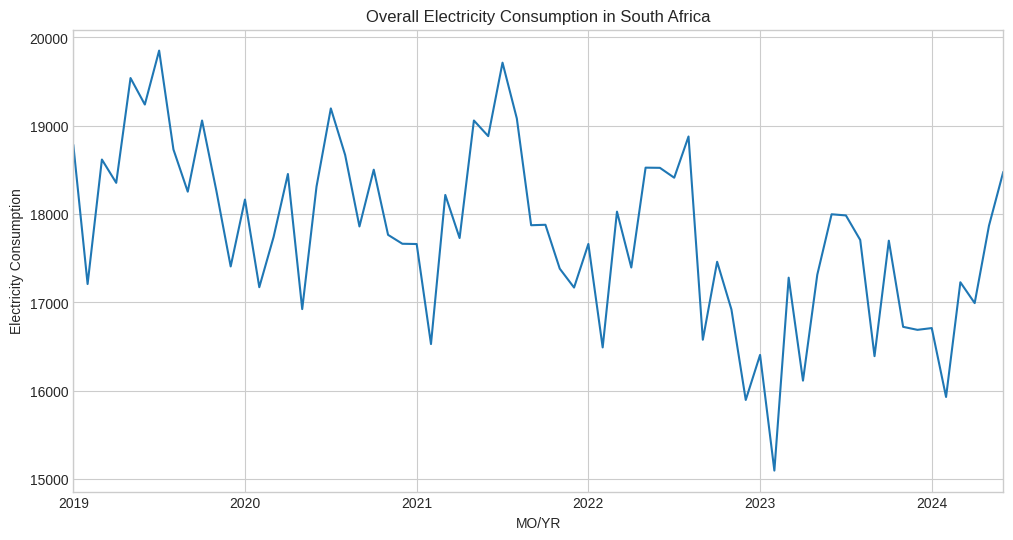

In [ ]:
# Overall Trends
last_five_years['South Africa'].plot(figsize=(12, 6), title='Overall Electricity Consumption in South Africa')
plt.ylabel('Electricity Consumption')
plt.show()

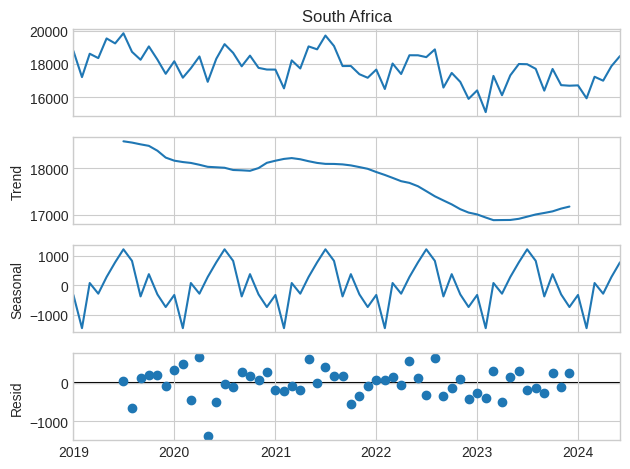

In [ ]:
# Seasonal Variations
result = seasonal_decompose(last_five_years['South Africa'], model='additive')
result.plot()
plt.show()

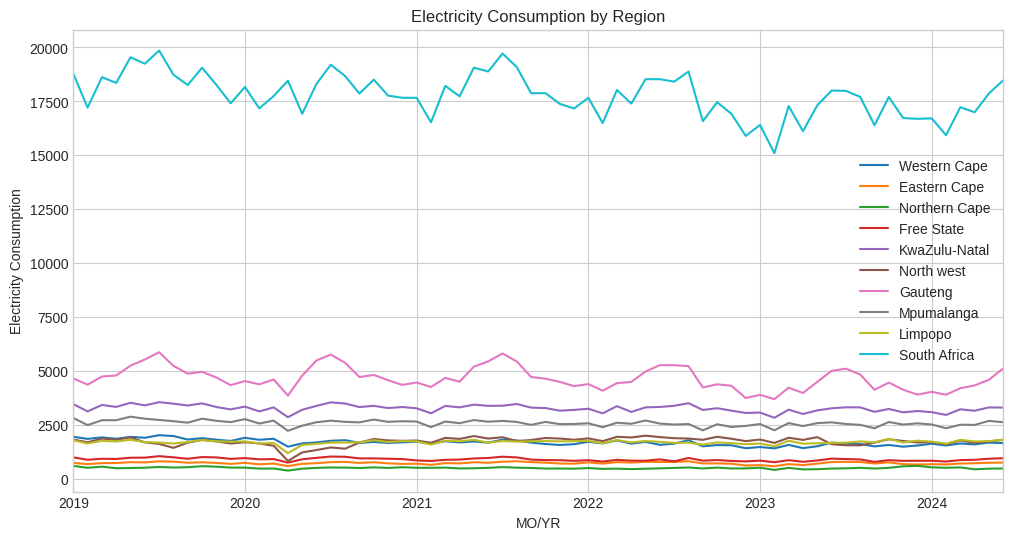

In [ ]:
# Consumption Differences
last_five_years.plot(figsize=(12, 6), title='Electricity Consumption by Region')
plt.ylabel('Electricity Consumption')
plt.show()

In [ ]:
# 4. Peak Load Analysis
peak_months = last_five_years['South Africa'].idxmax()
print("Month with the highest electricity consumption:", peak_months)

Month with the highest electricity consumption: 2019-07-01 00:00:00


In [ ]:
# Calculate the month-on-month percentage change for the 'South Africa' column
last_five_years['MoM Change (%)'] = last_five_years['South Africa'].pct_change() * 100

# Accumulate the changes
last_five_years['Accumulated Change (%)'] = last_five_years['MoM Change (%)'].cumsum()

# Display the result
print(last_five_years[['South Africa', 'MoM Change (%)', 'Accumulated Change (%)']])

            South Africa  MoM Change (%)  Accumulated Change (%)
MO/YR                                                           
2019-01-01         18785             NaN                     NaN
2019-02-01         17207       -8.400319               -8.400319
2019-03-01         18617        8.194340               -0.205980
2019-04-01         18353       -1.418059               -1.624039
2019-05-01         19540        6.467607                4.843569
...                  ...             ...                     ...
2024-02-01         15928       -4.668422               -7.196531
2024-03-01         17227        8.155450                0.958919
2024-04-01         16991       -1.369943               -0.411024
2024-05-01         17868        5.161556                4.750532
2024-06-01         18478        3.413924                8.164456

[66 rows x 3 columns]


<ipython-input-42-527df854b83b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_five_years['MoM Change (%)'] = last_five_years['South Africa'].pct_change() * 100
<ipython-input-42-527df854b83b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_five_years['Accumulated Change (%)'] = last_five_years['MoM Change (%)'].cumsum()


<ipython-input-43-d4ca9274a475>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_five_years['Month'] = last_five_years.index.month


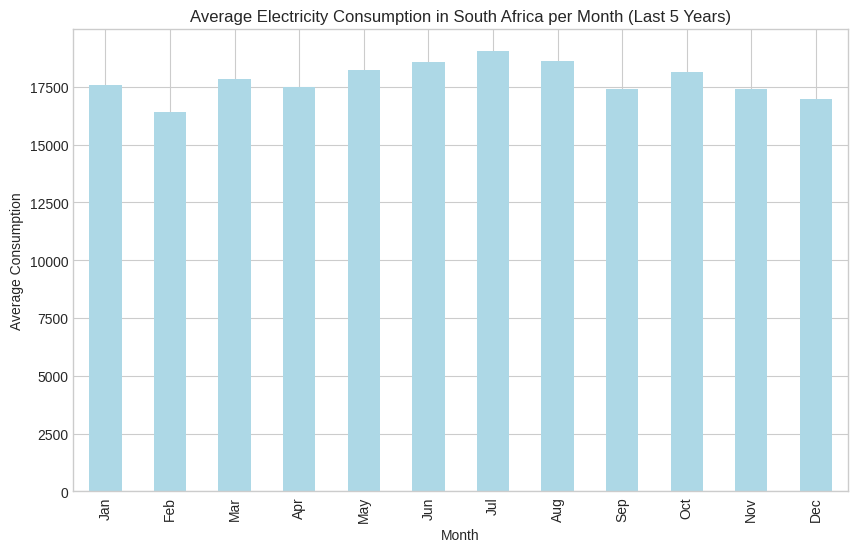

In [ ]:
# Extract the month from the index
last_five_years['Month'] = last_five_years.index.month

# Calculate the average consumption per month
monthly_avg_consumption = last_five_years.groupby('Month')['South Africa'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
monthly_avg_consumption.plot(kind='bar', color='lightblue')
plt.title('Average Electricity Consumption in South Africa per Month (Last 5 Years)')
plt.xlabel('Month')
plt.ylabel('Average Consumption')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
# Perform Dickey-Fuller test on the 'South Africa' column
result = adfuller(df['South Africa'])

# Extract and print the results
print('Dickey-Fuller Test Results:')
print(f'Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is not stationary.")

Dickey-Fuller Test Results:
Test Statistic: -2.312023762941405
p-value: 0.16811938814744565
Critical Values:
   1%: -3.4561550092339512
   5%: -2.8728972266578676
   10%: -2.5728222369384763
Fail to reject the null hypothesis. Data is not stationary.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       South Africa   No. Observations:                   66
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -421.239
Date:                            Thu, 29 Aug 2024   AIC                            852.479
Time:                                    10:31:16   BIC                            862.330
Sample:                                01-01-2019   HQIC                           856.267
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3909      0.194     -2.016      0.044      -0.771      -0.011
ma.L1         -0.0361      0.218   

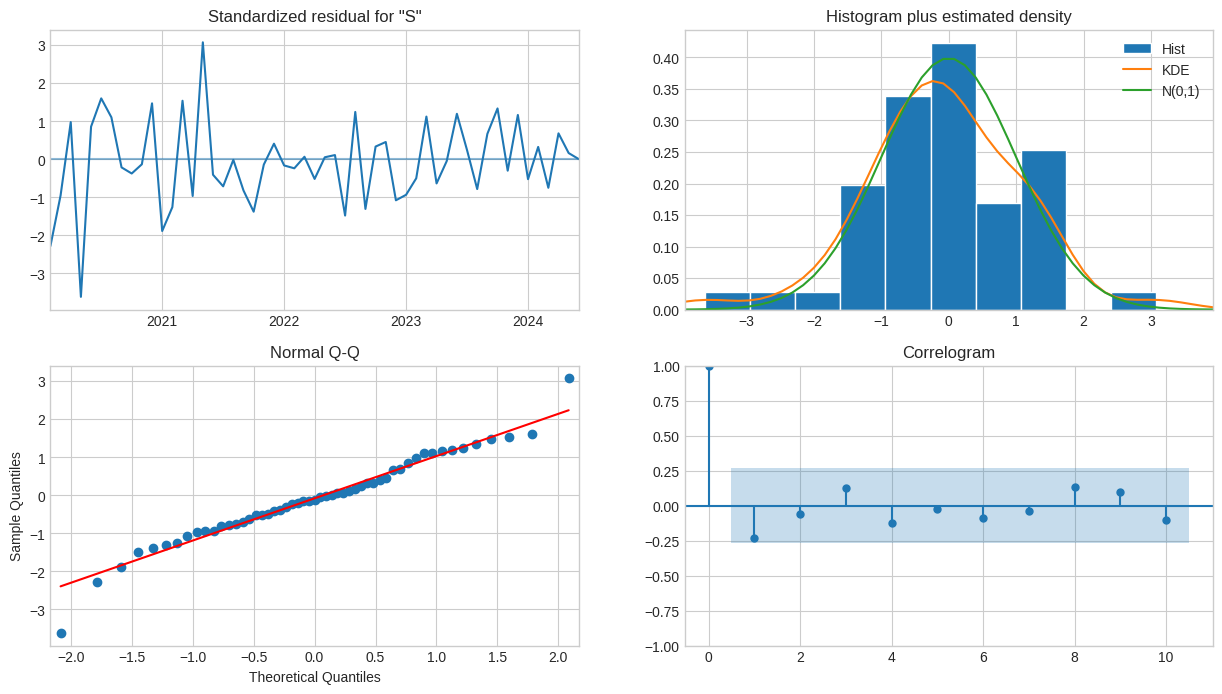

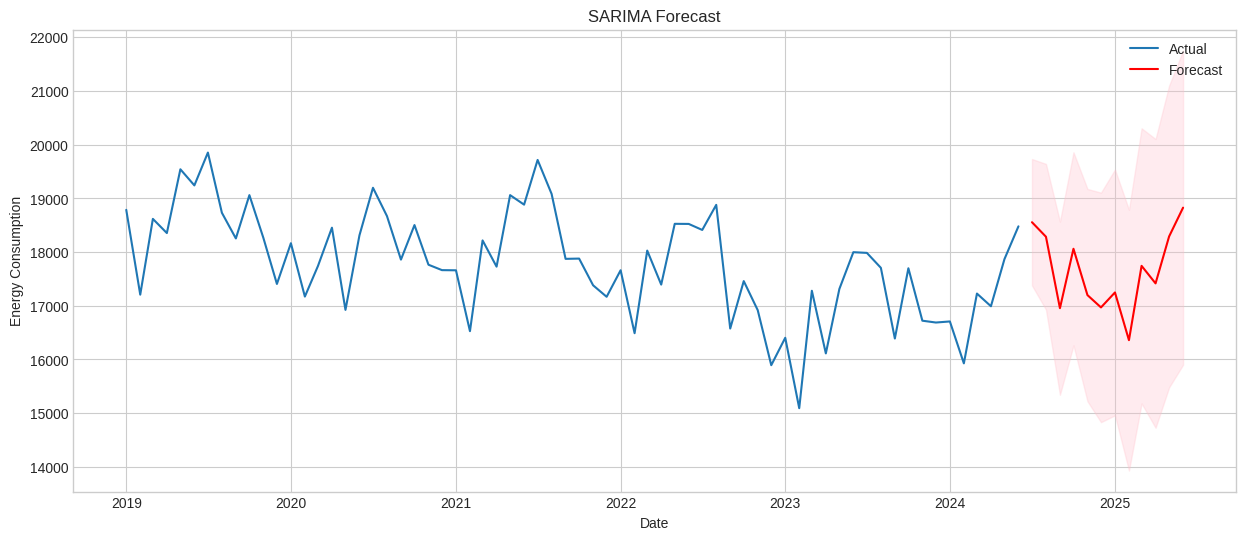

In [ ]:
# Model Identification
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Model Estimation
model = SARIMAX(last_five_years['South Africa'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Model Diagnostics
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecasting
# Example: Forecasting for the next 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Plotting forecast
plt.figure(figsize=(15, 6))
plt.plot(last_five_years.index, last_five_years['South Africa'], label='Actual')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_mean.index, forecast.conf_int()['lower South Africa'], forecast.conf_int()['upper South Africa'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


In [ ]:
#Forecasting for the next 12 months
forecast_steps = 6
forecast = results.forecast(steps=forecast_steps)

# The 'forecast' variable now contains the predicted values for the next 12 months
print("Predicted values for the next 6 months:")
print(forecast)


Predicted values for the next 6 months:
2024-07-01    18554.822628
2024-08-01    18284.571544
2024-09-01    16955.141953
2024-10-01    18060.512370
2024-11-01    17198.552969
2024-12-01    16969.238666
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


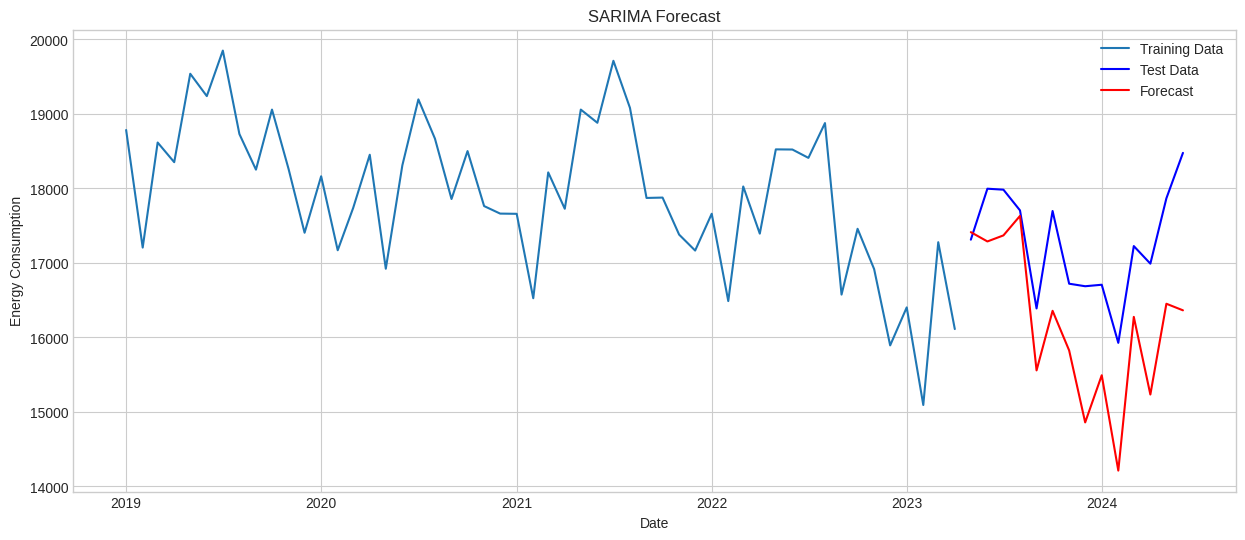

In [ ]:
# Define the cutoff point for splitting the data into training and test sets

cutoff_index = int(len(last_five_years) * 0.8)

# Split the data into training and test sets
train_data = last_five_years.iloc[:cutoff_index]
test_data = last_five_years.iloc[cutoff_index:]

# Model Estimation using training data
model = SARIMAX(train_data['South Africa'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecasting on test data
forecast_steps = len(test_data)
forecast = results.forecast(steps=forecast_steps)

# Plotting forecast
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['South Africa'], label='Training Data')
plt.plot(test_data.index, test_data['South Africa'], label='Test Data', color='blue')
plt.plot(test_data.index, forecast, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


In [ ]:
# Calculate forecasts for the test data
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# Calculate error metrics
# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['South Africa'], forecast_mean)

# Mean Squared Error (MSE)
mse = mean_squared_error(test_data['South Africa'], forecast_mean)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test_data['South Africa'] - forecast_mean) / test_data['South Africa'])) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Error (MAE): 1111.1481450023125
Mean Squared Error (MSE): 1599693.5556683433
Root Mean Squared Error (RMSE): 1264.789925508716
Mean Absolute Percentage Error (MAPE): 6.467616299411663%


<ipython-input-49-d33611b83e0f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


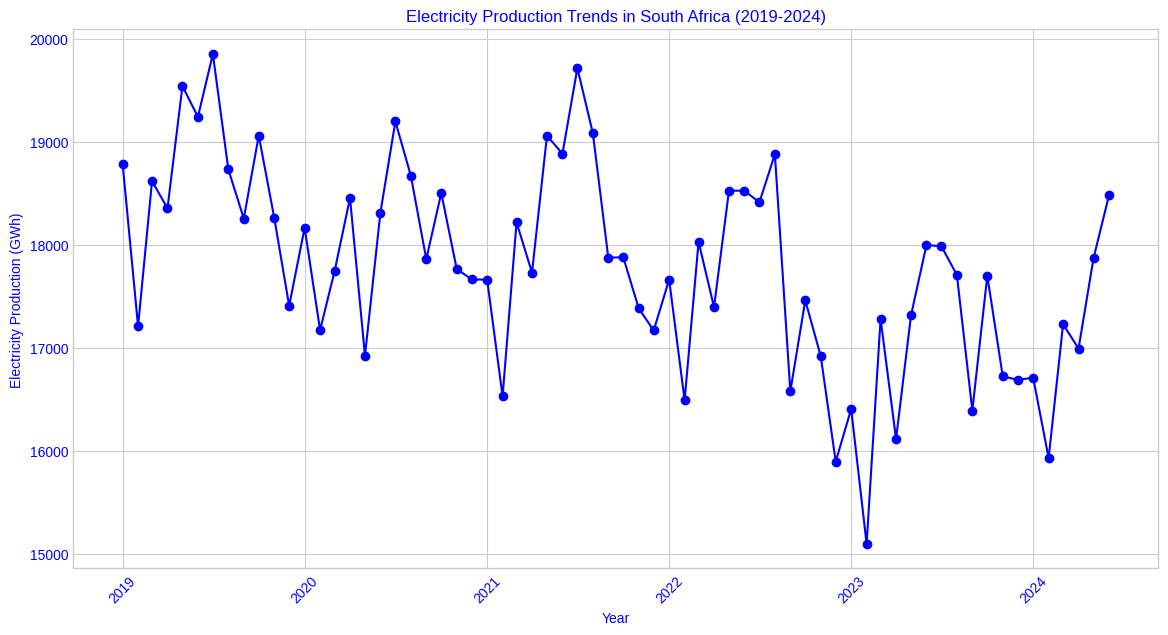

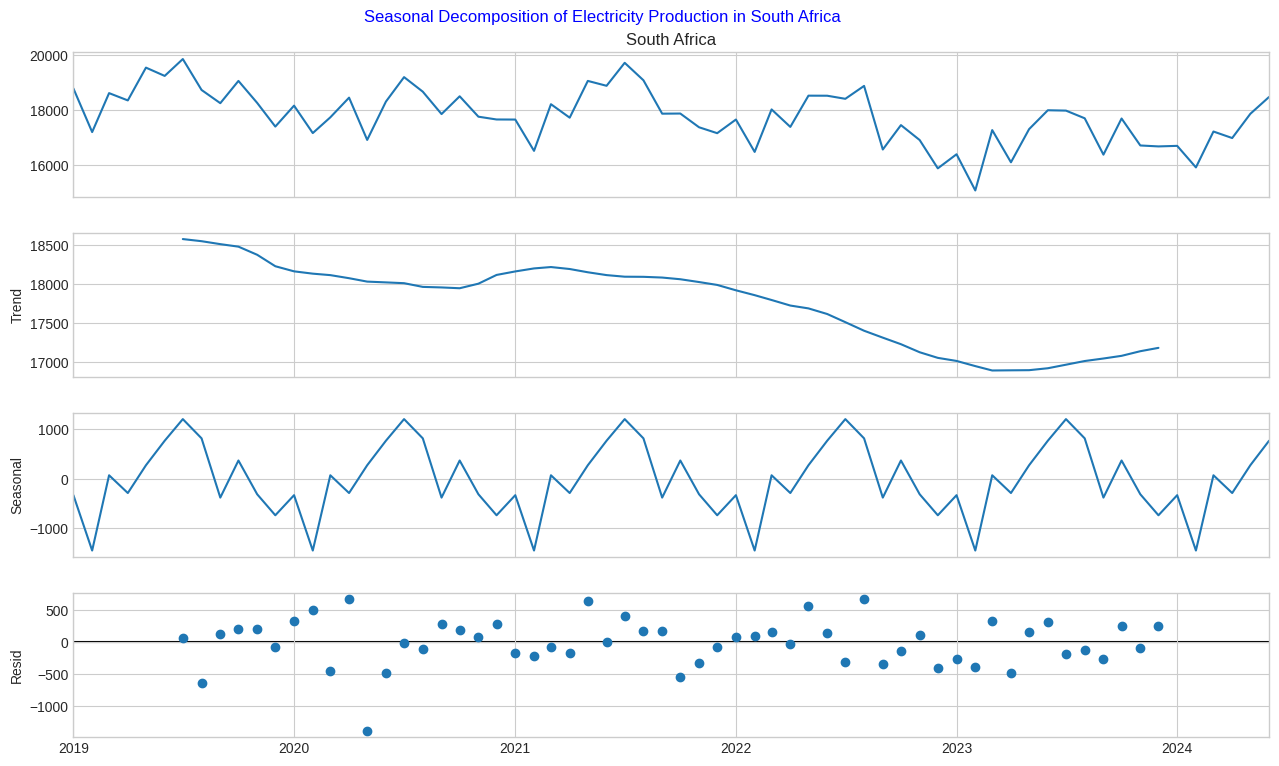

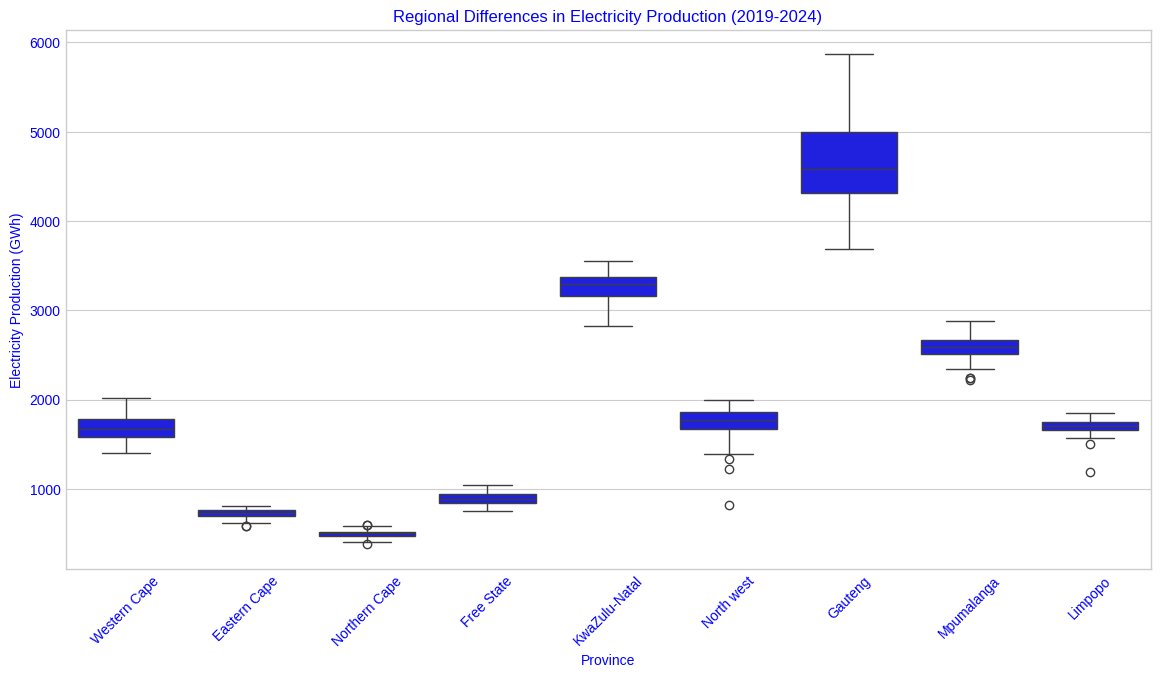

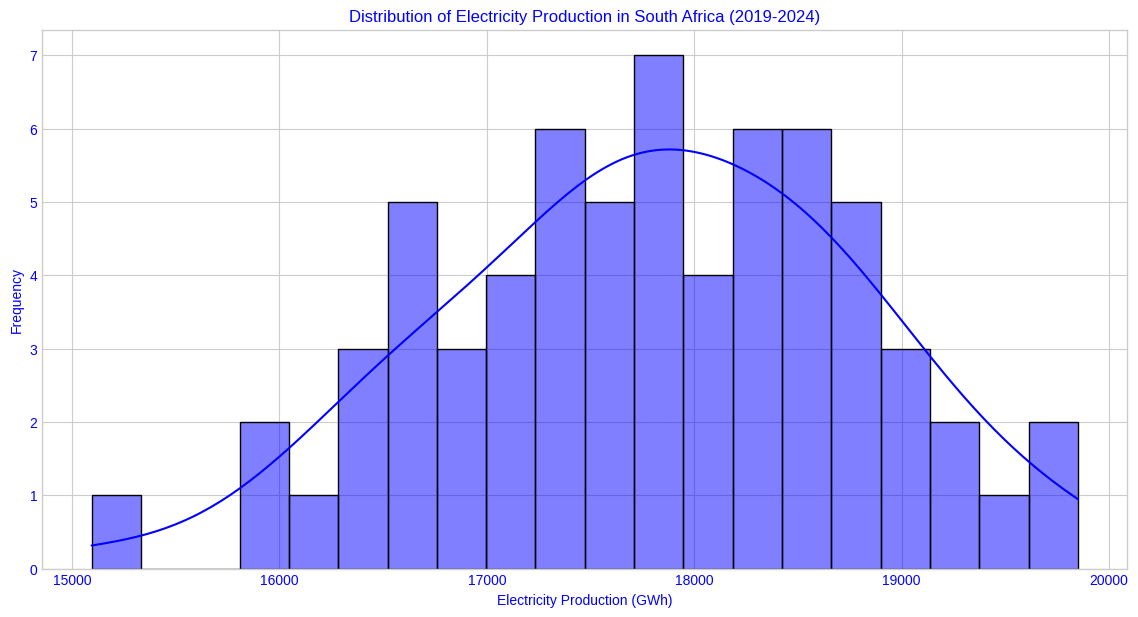

In [ ]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Set a white grid style with blue elements
plt.style.use('seaborn-whitegrid')

# 1. Line Plot for Electricity Production Trends (2019-2024)
plt.figure(figsize=(14, 7))
plt.plot(last_five_years.index, last_five_years['South Africa'], marker='o', linestyle='-', color='blue')  # Using 'blue' for line color
plt.title('Electricity Production Trends in South Africa (2019-2024)', color='blue')
plt.xlabel('Year', color='blue')
plt.ylabel('Electricity Production (GWh)', color='blue')
plt.xticks(rotation=45, color='blue')
plt.yticks(color='blue')
plt.show()

# 2. Seasonal Decomposition Plot
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(last_five_years['South Africa'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.suptitle('Seasonal Decomposition of Electricity Production in South Africa', color='blue')  # Adding a title
plt.show()

# 3. Box Plot for Regional Differences in Consumption Patterns
plt.figure(figsize=(14, 7))
sns.boxplot(data=last_five_years[['Western Cape', 'Eastern Cape', 'Northern Cape', 'Free State', 'KwaZulu-Natal', 'North west', 'Gauteng', 'Mpumalanga', 'Limpopo']], color='blue')
plt.title('Regional Differences in Electricity Production (2019-2024)', color='blue')
plt.xlabel('Province', color='blue')
plt.ylabel('Electricity Production (GWh)', color='blue')
plt.xticks(rotation=45, color='blue')
plt.yticks(color='blue')
plt.show()

# 4. Histogram for Electricity Production Distribution
plt.figure(figsize=(14, 7))
sns.histplot(last_five_years['South Africa'], kde=True, color='blue', bins=20)
plt.title('Distribution of Electricity Production in South Africa (2019-2024)', color='blue')
plt.xlabel('Electricity Production (GWh)', color='blue')
plt.ylabel('Frequency', color='blue')
plt.xticks(color='blue')
plt.yticks(color='blue')
plt.show()


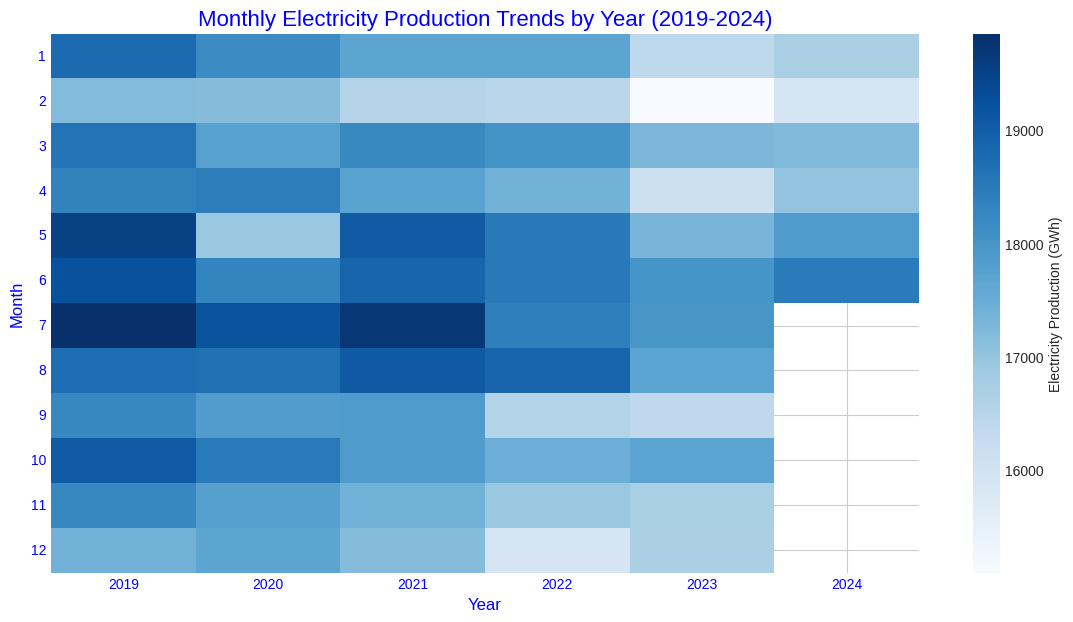

In [ ]:
plt.figure(figsize=(14, 7))
heatmap_data = last_five_years.pivot_table(values='South Africa', index=last_five_years.index.month, columns=last_five_years.index.year)

sns.heatmap(heatmap_data, cmap='Blues', cbar_kws={'label': 'Electricity Production (GWh)'})
plt.title('Monthly Electricity Production Trends by Year (2019-2024)', fontsize=16, color='blue')
plt.xlabel('Year', fontsize=12, color='blue')
plt.ylabel('Month', fontsize=12, color='blue')
plt.xticks(color='blue')
plt.yticks(color='blue', rotation=0)
plt.show()
